# zz

In [1]:
sehirler=["Adana", "Adıyaman", "Afyon", "Ağrı", "Amasya", "Ankara", "Antalya", "Artvin", "Aydın", "Balıkesir", 
          "Bilecik", "Bingöl", "Bitlis", "Bolu", "Burdur", "Bursa", "Çanakkale", "Çankırı", "Çorum", "Denizli", 
          "Diyarbakır", "Edirne", "Elazığ", "Erzincan", "Erzurum", "Eskişehir", "Gaziantep", "Giresun", "Gümüşhane", 
          "Hakkari", "Hatay", "Isparta", "Mersin", "İstanbul", "İzmir", "Kars", "Kastamonu", "Kayseri", "Kırklareli", 
          "Kırşehir", "Kocaeli", "Konya", "Kütahya", "Malatya", "Manisa", "Kahramanmaraş", "Mardin", "Muğla", "Muş", 
          "Nevşehir", "Niğde", "Ordu", "Rize", "Sakarya", "Samsun", "Siirt", "Sinop", "Sivas", "Tekirdağ", "Tokat", 
          "Trabzon", "Tunceli", "Şanlıurfa", "Uşak", "Van", "Yozgat", "Zonguldak", "Aksaray", "Bayburt", "Karaman", 
          "Kırıkkale", "Batman", "Şırnak", "Bartın", "Ardahan", "Iğdır", "Yalova", "Karabük", "Kilis", "Osmaniye", "Düzce"]

for i in range(len(sehirler)):
    sehirler[i] = sehirler[i].lower()
    sehirler[i] = sehirler[i].replace('i̇','i')

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import *
from scipy.stats import mode

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.ensemble import RandomForestRegressor
from hyperopt import tpe,hp,Trials
from hyperopt.fmin import fmin
import warnings
warnings.filterwarnings('ignore')
import os
from hyperopt import hp

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

C:\Users\egeme\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


#### accuracy_calculate function

In [3]:
def accuracy_calculate(actual_values, predicted_values):

  comparison = abs(np.round(predicted_values) - actual_values)
  accuracy = 1- ((len(comparison[comparison>=(0+1)])) / len(actual_values))

  return accuracy

#### mean_iou_calculator function

In [4]:
def mean_iou_calculator(actual_values, predicted_values, time):
  confusion_array = confusion_matrix(actual_values, predicted_values)
  individual_ious = []
  for i in range(len(confusion_array)):
    individual_iou = confusion_array[i][i] / (sum(confusion_array[i]))
    individual_ious.append(individual_iou)
  mean_iou = sum(individual_ious)/len(individual_ious)
  results = pd.DataFrame()  
  featue_y_values = sorted(data[time].unique())
  for i in range(len(individual_ious)):
    results.insert(0, 'iou_(' + str(featue_y_values[i])  +')', [individual_ious[i]], True)
  results = results[results.columns[::-1]]
  results.insert(0, 'mean_iou', mean_iou, True)
  return results

# Start

In [5]:
def read(csv):
    data = pd.read_csv(csv, sep=';', encoding = "utf8")
    #Rearannge the dataframe as the old one
    data.columns = ['product', 'amount', 'company', 'town', 'type', 'order date', 'delivery date', 'time']

    data2 = data.drop('delivery date', axis = 1)
    data2["order day"] = ''
    data2["order month"] = ''
    data2["week day"] = ''

    # Remove 'order date' and add 'order day', 'order month' and 'week day' features
    for i in range(len(data2)):
      data2.at[i, 'order day'] = data2['order date'][i].split()[0]
      data2.at[i, 'order month'] = data2['order date'][i].split()[1]
      data2.at[i, 'week day'] = data2['order date'][i].split()[-1]
    data2 = data2.drop('order date', axis = 1)
    data2['week day'] = data2['week day'].str.replace('Pazartesi','pts')
    data2['week day'] = data2['week day'].str.replace('Salı','sal')
    data2['week day'] = data2['week day'].str.replace('Çarşamba','çrş')
    data2['week day'] = data2['week day'].str.replace('Perşembe','prş')
    data2['week day'] = data2['week day'].str.replace('Cumartesi','cts')
    data2['week day'] = data2['week day'].str.replace('Cuma','cum')
    data2['week day'] = data2['week day'].str.replace('Pazar','paz')

    # data2 = data2[data2["week day"].str.contains("Pazar") == False]

    # Rearranging Dataframe
    data2 = data2[['product', 'company', 'amount', 'town', 'type', 'order day', 'week day', 'order month', 'time']]
    data2['town'] = data2['town'].str.lower()
    data2['town'] = data2['town'].str.replace('i̇','i')
    data2['town'] = data2['town'].str.replace('.','missing')
    data2['town'] = data2['town'].str.replace(' tekirdağ','tekirdağ')
    data2['town'] = data2['town'].str.replace('küçükçekmece','istanbul')
    data2['town'] = data2['town'].str.replace('çorlu','tekirdağ')
    data2['town'] = data2['town'].str.replace('bandirma','balıkesir')

    #data2 = data2.drop('town',axis = 1).reset_index(drop=True)
    data2 = data2.drop('order day',axis = 1).reset_index(drop=True)
    #data2 = data2.drop('order month',axis = 1).reset_index(drop=True)
    data2 = data2.fillna("missing")
    #data2 = data2[data2["town"].str.contains("missing") == False]

    data_clean = data2.copy()
    drop_df = data2.copy()
    drop_index_list = []
    return data2, data_clean ,drop_df, drop_index_list

data2, data_clean ,drop_df, drop_index_list = read('gulle.csv')   ######### Yüklemek istediğin dosyayı buraya gir.
data2

,product,company,amount,town,type,week day,order month,time
0,K477,T-029,1,bursa,1,pts,Temmuz,2
1,K669,T-016,1,istanbul,1,cum,Temmuz,4
2,K75,T-018,1,istanbul,1,çrş,Ağustos,1
3,K669,T-016,1,istanbul,1,pts,Ağustos,1
4,K513,T-034,1,istanbul,1,sal,Eylül,1
...,...,...,...,...,...,...,...,...
1111,K522,T-034,960,istanbul,1,sal,Eylül,1
1112,K730,T-060,960,tekirdağ,1,pts,Eylül,4
1113,K788,T-060,960,tekirdağ,1,pts,Eylül,4
1114,K1117,T-0211,960,kocaeli,1,sal,Nisan,1


# Get list of abroad companies and products that are supplied from abroad

In [6]:
abr = [item for item in data2["town"].unique() if item not in sehirler]
abr_str = ""

for i in range (len(abr)):
    abr_str = abr_str + "|" + abr[i]
abr_str = abr_str[1:]

if len(abr) != 0:
    data3 = data2[data2["town"].astype('str').str.contains(abr_str) == True]
    abr_comp_list = data3["company"].unique()
    abr_prod_list = data3["product"].unique()
    print("abroad company list: ",abr_comp_list)
    print("abroad product list: ",abr_prod_list)
else:
    print("no abroad company")


abroad company list:  ['T-0142' 'MZ-401']
abroad product list:  ['K730' 'K390' 'MRL313' 'K1046' 'K143' 'K664' 'K9' 'K389' 'K256' 'K395']


# Remove insufficient data

In [7]:
def remove_insuff(df, ft):
    print("removing insufficient data for", ft, "...")
    fst_len = len(df)
    x = df[ft].value_counts() < 10
    df2 = x.to_frame().reset_index()
    df2.columns = [ft, 'booly']
    df2.drop(df2[df2.booly == False].index, inplace=True)
    drop_list = df2[ft].tolist()
    drop_indices=[]

    if len(drop_list) != 0:
        for i in df.index:
            for j in range(len(drop_list)):
                if (drop_list[j] == df.at[i, ft]):
                    drop_indices = drop_indices + [i]
        df.drop(drop_indices, inplace=True)
        
    else:
        drop_indices = []
                        
    lst_len = len(df)
    rem = fst_len - lst_len      # number of removed data
    per = (rem / fst_len) * 100  # percentage of removed data

    print("total number of removed data: ", rem)
    print("persentage of removed data: ", round(per, 2), "%")
    return df, drop_indices

data2, drop_indices = remove_insuff(data2, "company")
drop_index_list += drop_indices
print("\n")

data2, drop_indices = remove_insuff(data2, "product")
drop_index_list += drop_indices

removing insufficient data for company ...
total number of removed data:  73
persentage of removed data:  6.54 %


removing insufficient data for product ...
total number of removed data:  293
persentage of removed data:  28.09 %


# Clean noise

In [8]:
def clean_noise(df): 
    in_len = len(df)
    zs = 0.89
    
    n_prod = df["product"].nunique()
    prod_list = df["product"].unique()
    n_comp = df["company"].nunique()
    comp_list = df["company"].unique()
    
    print("Cleaning noise ... ")
    
    index_drop_list = []
    for prod in prod_list:

        df_max_scaled = df[df["product"] == prod].copy()

        for comp in comp_list:
            df_max_scaled2 = df_max_scaled[df_max_scaled["company"] == comp].copy()

            if len(df_max_scaled2) > 1:
                
                max_min_t = df_max_scaled2["time"].max() - df_max_scaled2["time"].min()
                max_min_a = df_max_scaled2["amount"].max() - df_max_scaled2["amount"].min()
                
                if (max_min_a != 0) and (max_min_t != 0):
                    df_max_scaled2["time"] = (df_max_scaled2["time"] - df_max_scaled2["time"].min()) / max_min_t
                    t_sc = df_max_scaled2[["time"]]
                    df_zscore_t = (t_sc - t_sc.mean())/t_sc.std()
                    dfz_t = abs(df_zscore_t) > zs

                    df_max_scaled2["amount"] = (df_max_scaled2["amount"] - df_max_scaled2["amount"].min()) / max_min_a
                    amo_sc = df_max_scaled2["amount"]
                    df_zscore_a = (amo_sc - amo_sc.mean())/amo_sc.std()
                    dfz_a = abs(df_zscore_a) > zs

                    df1 = dfz_t["time"] & dfz_a 
                    df2 = (df_zscore_t["time"] * df_zscore_a) < 0 
                    dfz = df1 & df2 

                    index_drop_list = index_drop_list + [*filter(dfz.get, dfz.index)]

    index_drop_list = sorted(list(set(index_drop_list)))
    df.drop(index_drop_list, axis=0, inplace=True)
    rem = len(index_drop_list)
    f_len = len(df)
    n_del = in_len - f_len
    per = (n_del / in_len) * 100
    
    #print("deleted indices: ",index_drop_list)
    print("total number of removed data: ", n_del)
    print("persentage of removed data: ", round(per, 2), "%")
    
    return df, index_drop_list



In [9]:
def clean_noise_tt(df): 
    in_len = len(df)
    zst = 1.8
    
    n_prod = df["product"].nunique()
    prod_list = df["product"].unique()
    n_comp = df["company"].nunique()
    comp_list = df["company"].unique()
        
    print("Cleaning time noise ... ")
    
    index_drop_list = []
    for prod in prod_list:

        df_max_scaled = df[df["product"] == prod].copy()

        for comp in comp_list:
            df_max_scaled2 = df_max_scaled[df_max_scaled["company"] == comp].copy()

            if len(df_max_scaled2) > 1:
                
                max_min_t = df_max_scaled2["time"].max() - df_max_scaled2["time"].min()
                
                if (max_min_t != 0):
                    df_max_scaled2["time"] = (df_max_scaled2["time"] - df_max_scaled2["time"].min()) / max_min_t
                    t_sc = df_max_scaled2[["time"]]
                    df_zscore_t = (t_sc - t_sc.mean())/t_sc.std()
                    dfz_t = abs(df_zscore_t) > zst
                    
                    index_drop_list += dfz_t[dfz_t["time"].eq(True)].index.tolist()
                    
                    #index_drop_list = index_drop_list + [*filter(dfz_t.get, dfz_t.index)]

    index_drop_list = sorted(list(set(index_drop_list)))
    df.drop(index_drop_list, axis=0, inplace=True)
    rem = len(index_drop_list)
    f_len = len(df)
    n_del = in_len - f_len
    per = (n_del / in_len) * 100
    
    #print("deleted indices: ",index_drop_list)
    print("total number of removed data: ", n_del)
    print("persentage of removed data: ", round(per, 2), "%")
    
    return df, index_drop_list


In [10]:
pd.options.mode.chained_assignment = None

data2, train_drop_list = clean_noise(data2)
drop_index_list = drop_index_list + train_drop_list
print("\n")

data2, train_drop_list = clean_noise_tt(data2)
drop_index_list = drop_index_list + train_drop_list


Cleaning noise ... 
total number of removed data:  18
persentage of removed data:  2.4 %


Cleaning time noise ... 
total number of removed data:  42
persentage of removed data:  5.74 %


# Group & Map time

In [11]:
def group_time(df):
    
    min_samp = len(df)*0.07 
    t = 1
    gs = 0
    group = []
    sub_group = [t]
    #gap = df["time"].std()

    while t <= df["time"].max():
        
        
        if sum(df["time"] == t) > 0:
        
            gs += sum(df["time"] == t)

            if (len(sub_group) > 0) and ((t - min(sub_group)) <= math.ceil(math.sqrt(min(sub_group)))):
                sub_group += [t]

            else:
                if (len(sub_group) != 0):
                    gs = 0
                    group += [sub_group]
                sub_group = [t]

            if (gs >= min_samp) or ((t - min(sub_group)) > math.ceil(math.sqrt(min(sub_group)))):
                gs = 0
                group += [sub_group]
                sub_group = []
                
        if t == df["time"].max() :
            group += [sub_group]
            group[0].remove(1)
            
            c = True               # son sub_grouptan bir önceki sub_groupa time aktarımı
            gap = group[-2][0]     # son sub_grouptan bir önceki sub_groupa yollanan time değerleri arasındaki maksimum fark 
            while c:
                if len(group[- 1]) >= 2:
                    x = group[-1][0]
                    x_l = group[-2] [-1]
                    x_r = group[-1] [1]

                    if (x - group[-2][0]) <= math.ceil(math.sqrt(group[-2][0])):
                        group[-2].append(x)
                        group[-1].remove(x)
                
                x = group[-1][0]
                if (x - group[-2][0]) <= math.ceil(math.sqrt(group[-2][0])):
                    group[-2].append(x)
                    group[-1].remove(x)
                    
                else:
                    c = False
            
        t += 1
        
    return group

groups = group_time(data2)


########################################################################################### REMOVE INSUFFICIENT GROUPS
def remove_insuff_groups(df, groups):
    c = True     # herhangi bir sub_groupta bulunan zamanlar dataframede 10 kereden az bulunuyorsa bu sub_groupu sil
    insuff_time = []
    while c:
        for i in range(len(groups)):
            s = 0
            for j in range(len(groups[i])):
                s += sum(df["time"] == groups[i][j])
            if s < 10:
                insuff_time += groups[i]
        c = False

    return insuff_time

insuff_time = remove_insuff_groups(data2, groups)


########################################################################################### MAP TIME
def map_time(df, groups, insuff_time):
    print("Mapping time")
    index_drop_list = []
    for i in df.index:
        for t in insuff_time:
            if df.at[i, "time"] == t:
                index_drop_list += [i]
                
    df.drop(index_drop_list, axis=0, inplace=True)

    time = -1
    for sub_group in groups:
        
        time += 1
        for t in sub_group:
            for i in df.index:
                if df.at[i, "time"] == t:
                    df.at[i, "time"] = time
                    
        if sub_group[0] not in insuff_time:
            print( sub_group, " --------> ", time)

    return df

print(data2.groupby('time').size())
print("\n")
data2 = map_time(data2, groups, insuff_time)
print("insuff_time: ", insuff_time)
print("classes: ", sorted(data2["time"].unique()))

time
1     395
2     106
3      80
4      52
5      19
6      17
7       7
8       1
9       3
10      2
11      2
12      1
14      2
34      1
39      1
44      1
dtype: int64


Mapping time
[1]  -------->  0
[2]  -------->  1
[3]  -------->  2
[4]  -------->  3
[5, 6, 7, 8]  -------->  4
insuff_time:  [9, 10, 11, 12, 14, 34, 39, 44]
classes:  [0, 1, 2, 3, 4]


# One - Hot - Encoding

In [12]:
def one_hot(df, ft):      ### ft = "company", "product", "week day" etc.
    print("one hot encoding ", ft, "...")
    dum = pd.get_dummies(df[ft])
    df = df.drop(ft, axis = 1)
    df = df.join(dum)
    print(ft, "encoded.")
    return df
data2  = one_hot(data2, "week day")
data2  = one_hot(data2, "company")
data2  = one_hot(data2, "product")
data2  = one_hot(data2, "order month")

one hot encoding  week day ...
week day encoded.
one hot encoding  company ...
company encoded.
one hot encoding  product ...
product encoded.
one hot encoding  order month ...
order month encoded.


In [13]:
#data2.drop(train_drop_list, axis=0, inplace=True)
#data2.drop(val_drop_list, axis=0, inplace=True)

# Drop_df

In [14]:
drop_index_list = sorted(list(set(drop_index_list)))
drop_df = drop_df.loc[drop_index_list]

data_clean.drop(drop_df.index.to_list(), axis=0, inplace=True)

# Drop town column

In [15]:
data2 = data2.drop('town',axis = 1).reset_index(drop=True)

# Train - Test Split

In [16]:
X = data2.copy()
Y = data2.copy()
X.drop("time", axis=1, inplace=True)
Y = Y["time"]

x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size = 0.3, random_state = 42)

# Normalize amount

In [17]:
xt_min = x_train["amount"].min()
xt_max = x_train["amount"].max()

x_train["amount"] = (x_train["amount"] - xt_min) / (xt_max - xt_min)
x_val["amount"] = (x_val["amount"] - xt_min) / (xt_max - xt_min)

# Create a df_empty with the same columns of x_train 

In [18]:
df_empty = x_train[0:0]

# PCA

In [19]:
def do_pca(x_train, x_val):
    from sklearn.decomposition import PCA
    xl = len(x_train.columns)
    pca = PCA(.95)
    pca.fit(x_train)
    print("number of features dropped from ", xl, " to ", pca.n_components_) 
    #print("variance ratio: ", pca.explained_variance_ratio_) 

    x_train = pca.transform(x_train)
    x_val = pca.transform(x_val)
    return pca, x_train, x_val

print("\n")
pca, x_train, x_val = do_pca(x_train, x_val)



number of features dropped from  61  to  36


# Results

### Train

In [20]:
random_state = 42

Logistic_Regression = LogisticRegression(random_state= random_state).fit(x_train, y_train.astype('int'))
rndmForest = RandomForestClassifier(random_state=random_state).fit(x_train, y_train.astype('int'))                                                                
KNeighbors = KNeighborsClassifier().fit(x_train, y_train.astype('int'))

LogisticRegression_predictions = Logistic_Regression.predict(x_train)
rndmForest_predictions = rndmForest.predict(x_train)
KNeighbors_predictions = KNeighbors.predict(x_train)

print('Accuracy of LogisticRegression classifier: ', accuracy_calculate(y_train, LogisticRegression_predictions))
print('Accuracy of RandomForest classifier: ', accuracy_calculate(y_train, rndmForest_predictions))
print('Accuracy of KNeighbors classifier: ', accuracy_calculate(y_train, KNeighbors_predictions))

Accuracy of LogisticRegression classifier:  0.7103594080338267
Accuracy of RandomForest classifier:  0.9640591966173362
Accuracy of KNeighbors classifier:  0.7124735729386893


#### Balanced Accuracy / train

In [21]:
print('Balanced_Accuracy of LogisticRegression classifier: ', balanced_accuracy_score(y_train, LogisticRegression_predictions))
print('Balanced_Accuracy of RandomForest classifier: ', balanced_accuracy_score(y_train, rndmForest_predictions))
print('Balanced_Accuracy of KNeighbors classifier: ', balanced_accuracy_score(y_train, KNeighbors_predictions))

Balanced_Accuracy of LogisticRegression classifier:  0.5053576116265373
Balanced_Accuracy of RandomForest classifier:  0.9343098526083387
Balanced_Accuracy of KNeighbors classifier:  0.5078497877993191


### Confusion matrices of train dataset

#### LogisticRegression / train

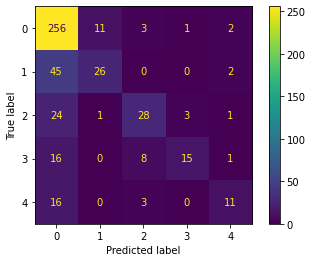

In [22]:
cm = confusion_matrix(y_train, LogisticRegression_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### RandomForestClassifier / train

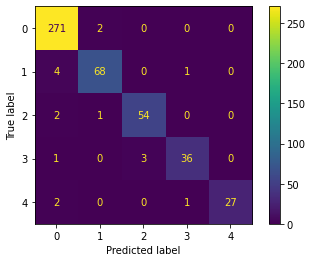

In [23]:
cm = confusion_matrix(y_train, rndmForest_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### KNeighborsClassifier  / train

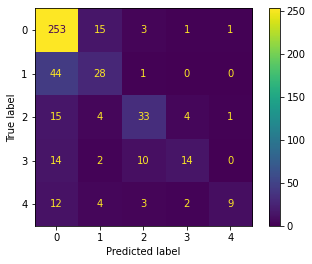

In [24]:
cm = confusion_matrix(y_train, KNeighbors_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Test

In [25]:
LogisticRegression_predictions = Logistic_Regression.predict(x_val)
rndmForest_predictions = rndmForest.predict(x_val)
KNeighbors_predictions = KNeighbors.predict(x_val)

print('Accuracy of LogisticRegression classifier: ', accuracy_calculate(y_val, LogisticRegression_predictions))
print('Accuracy of RandomForest classifier: ', accuracy_calculate(y_val, rndmForest_predictions))
print('Accuracy of KNeighbors classifier: ', accuracy_calculate(y_val, KNeighbors_predictions))

Accuracy of LogisticRegression classifier:  0.6568627450980392
Accuracy of RandomForest classifier:  0.6470588235294117
Accuracy of KNeighbors classifier:  0.642156862745098


#### Balanced Accuracy / test

In [26]:
print('Balanced_Accuracy of LogisticRegression classifier: ', balanced_accuracy_score(y_val, LogisticRegression_predictions))
print('Balanced_Accuracy of RandomForest classifier: ', balanced_accuracy_score(y_val, rndmForest_predictions))
print('Balanced_Accuracy of KNeighbors classifier: ', balanced_accuracy_score(y_val, KNeighbors_predictions))

Balanced_Accuracy of LogisticRegression classifier:  0.4032904135541341
Balanced_Accuracy of RandomForest classifier:  0.38700203336696565
Balanced_Accuracy of KNeighbors classifier:  0.37099597954908003


### Confusion matrices of test dataset

#### LogisticRegression / test

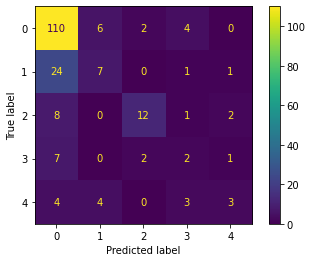

In [27]:
cm = confusion_matrix(y_val, LogisticRegression_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### RandomForestClassifier / test

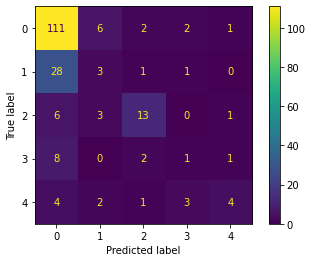

In [28]:
cm = confusion_matrix(y_val, rndmForest_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### KNeighborsClassifier / test

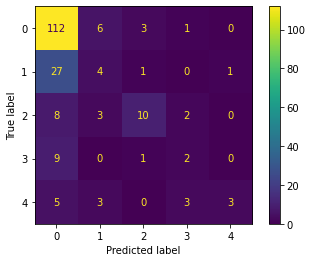

In [29]:
cm = confusion_matrix(y_val, KNeighbors_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Take input and create df_inp 

In [30]:
def is_prod_in_data(df):
    prods = df["product"].unique()
    prd = str(input("Product seç: "))
    if prd not in prods: 
        return False, prd
    else:
        return True, prd
    
def is_prod_in_data_drop(df, prd):
    prods = df["product"].unique()
    if prd not in prods: 
        return False
    else:
        return True

In [31]:
def take_input(df, prd):
    amo = input("Amount: ") 
    y = False
    while y == False:
        if (amo.isnumeric() == False):
            print("Pozitif tam sayı değer giriniz")
            amo = input("Amount: ")

        else:
            d = max(df[df["product"] == prd]["amount"].to_list()) * 3
            if int(amo) > d:
                print("Amount yüksek abi emin misin bak !?")
                y_n = input("y / n ?")
                if y_n == "y":
                    y = True
                elif y_n == "n":
                    amo = input("Amount: ")                   
            else:
                y = True
    amo = int(amo)

    w_days = ['pts', 'sal', 'çrş', 'prş', 'cum', 'cts', 'paz']
    wd = str(input("Week day: "))
    z = False
    while z == False:
        if wd not in w_days:
            print("Geçerli gün giriniz...")
            print("Geçerli günler: ", w_days)
            wd = str(input("Week day: "))
        else:
            z = True

    typ = df[df["product"] == prd]["type"].unique()[0] 
    comps = df[df["product"] == prd]["company"].unique()
    tws = df[df["product"] == prd]["town"].unique()

    df_inp = pd.DataFrame(columns = ['product', 'company', 'amount', 'town', 'type', 'week day'])

    for comp in comps:
        tw = df[(df["product"] == prd) & (df["company"] == comp)]["town"].unique()[0]

        df_inp = df_inp.append({'product' : prd, 'company' : comp, 'amount' : amo, 'town' : tw,'type' : typ,
                            'week day' : wd}, ignore_index=True)

    return df_inp, comps

# Take Input !!!!!!!!!!!!
##### yetersiz datalardaysa ve farklı şirketlerden tedarik edilmişse ayrı ayrı ortalama süre verilebilir

In [32]:
def run():
    #c = True
    cond1 = False ###
    #while c:
    while cond1 == False: ###
        tf, prd = is_prod_in_data(data_clean)
        
        if tf:
            df_inp, comps = take_input(data_clean, prd)
            c = False
            cond1 = True
        else:
            if (is_prod_in_data_drop(drop_df, prd) == True):
                print("Güvenilir sonuç için product'a ait en az 5 giriş bulunmalıdır.")
                print("\n","Daha önce bu product alımları: ")
                a = drop_df[drop_df["product"] == prd]
                a = a.index.to_list()
                a = data.loc[a]
                df_inp = display(a[['company', 'amount', 'town', 'order date', 'delivery date', 'time']].style.hide(axis='index'))
                print ("Ortalama miktar = ", a["amount"].mean(), "Ortalama süre = ", a["time"].mean())
                comps = a["company"].unique()
                return df_inp, cond1, comps
    
            else:
                df_inp = print("Product bulunamadı.")
    if cond1:
        df_inp  = one_hot(df_inp, "week day")
        df_inp  = one_hot(df_inp, "product")
        df_inp  = one_hot(df_inp, "company")

        df_inp = df_inp.drop('town',axis = 1).reset_index(drop=True)

        df_inp["amount"] = (df_inp["amount"] - xt_min) / (xt_max - xt_min)

        df_inp = df_empty.append(df_inp)   # for the next version of pandas use the next line of code instead of this one. 
        #df_inp = pd.concat([df_inp, df_empty])   ------->>> for the future version of pandas
        
        df_inp = df_inp.fillna(0)
        df_inp = pca.transform(df_inp)
        
    return df_inp, cond1, comps
        

In [33]:
df_inp, cond1, comps = run()

Product seç: K669
Amount: 100
Week day: sal
one hot encoding  week day ...
week day encoded.
one hot encoding  product ...
product encoded.
one hot encoding  company ...
company encoded.


# Predict

In [35]:
if cond1:
    LR = Logistic_Regression.predict(df_inp)
    RF = rndmForest.predict(df_inp)
    KN = KNeighbors.predict(df_inp)
   
    print("LR: ", LR, "\nRF:", RF, "\nKN:", KN)
    
    res = np.array([])
    output = np.array([])
    for i in range(len(LR)):
        res = np.append(res, [LR[i], RF[i], KN[i]])
        m = mode(res)[0][0]
        output = np.append(output, m)
        res = np.array([])
    
    print("for company ", comps[i], " predicted time = ", output[i])

LR:  [0] 
RF: [0] 
KN: [0]
for company  T-0211  predicted time =  0.0


In [36]:
del(df_inp)